In [1]:
### Regression
### Input: Fuel consumption. Raw data: https://github.com/gsoh/VED
### Tool: numpy.polynomial

### Step 0. Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

### Step 1. Import data

In [3]:
emission_data = pd.read_csv('data/regression_emission_data/regression_data.csv')
emission_data.head()

,edge_id,VehId,Trip,link_average_speed_kmph,link_average_fuel_lpm,maxspeed_range
0,1.0,12,494,39.428571,0.250445,35.0
1,1.0,12,503,50.551724,0.240629,35.0
2,1.0,12,568,46.285714,0.180156,35.0
3,1.0,12,576,42.000000,0.348490,35.0
4,1.0,12,740,45.050000,0.149412,35.0


In [4]:
emission_data.groupby('maxspeed_range').size()

maxspeed_range
5.0         6
10.0        6
15.0      749
25.0    29353
30.0    37865
35.0    79447
40.0    31899
45.0    39976
50.0     2376
55.0     1600
65.0      516
70.0    16204
dtype: int64

(0.0, 1.0)

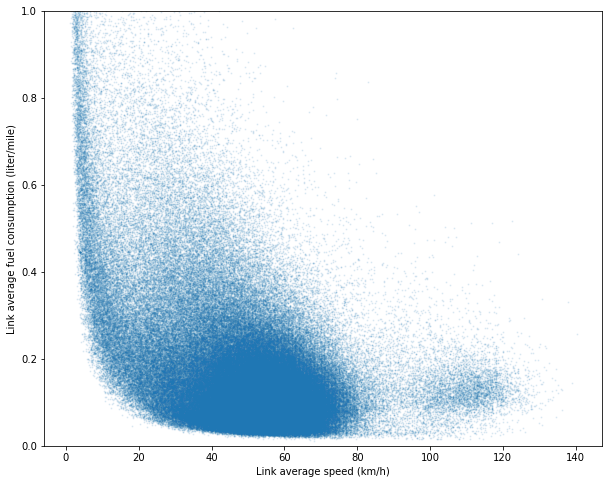

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(emission_data['link_average_speed_kmph'], 
           emission_data['link_average_fuel_lpm'], s=1, alpha=0.1)
ax.set_xlabel('Link average speed (km/h)')
ax.set_ylabel('Link average fuel consumption (liter/mile)')
ax.set_ylim([0, 1])

### Step 2. Basic regression

[ 7.08299831e-01 -1.73910475e-02  1.21133130e-04]


(0.0, 1.0)

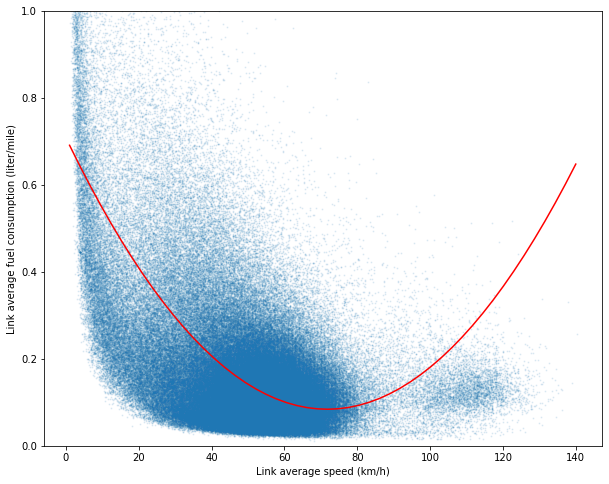

In [40]:
#polynomial fit with degree = 2
emission_data['x'] = emission_data['link_average_speed_kmph']
emission_data['y'] = emission_data['link_average_fuel_lpm']
coefs = poly.polyfit(emission_data['x'], 
           emission_data['y'], 2)
ffit = poly.Polynomial(coefs) 
print(coefs)

#add fitted polynomial line to scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(emission_data['link_average_speed_kmph'], 
           emission_data['link_average_fuel_lpm'], s=1, alpha=0.1)
polyline = np.linspace(1, 140, 50)
plt.plot(polyline, ffit(polyline), c='r')

ax.set_xlabel('Link average speed (km/h)')
ax.set_ylabel('Link average fuel consumption (liter/mile)')
ax.set_ylim([0, 1])

[-0.34534615 -5.27834128  3.46606802]


(0.0, 1.0)

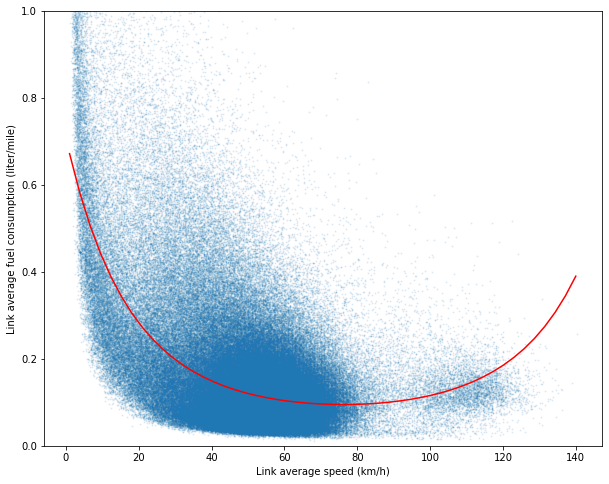

In [39]:
#polynomial fit with degree = 2
emission_data['x'] = emission_data['link_average_speed_kmph']/100
emission_data['y'] = np.log(emission_data['link_average_fuel_lpm'])
coefs = poly.polyfit(emission_data['x'], 
           emission_data['y'], 2)
ffit = poly.Polynomial(coefs) 
print(coefs)

#add fitted polynomial line to scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(emission_data['link_average_speed_kmph'], 
           emission_data['link_average_fuel_lpm'], s=1, alpha=0.1)
polyline = np.linspace(1, 140, 50)
plt.plot(polyline, np.exp(ffit(polyline/100)), c='r')

ax.set_xlabel('Link average speed (km/h)')
ax.set_ylabel('Link average fuel consumption (liter/mile)')
ax.set_ylim([0, 1])

### Step 3. Regression by speed range

[-0.13485401 -7.11851132  5.87017059]
[-0.16508946 -6.91628854  5.6438053 ]
[-0.27624748 -5.35322579  3.42927067]
[-0.29730203 -5.31303209  3.57333381]
[-0.35052311 -4.99864465  3.2010906 ]
[-1.26083762 -2.99663058  2.05347637]


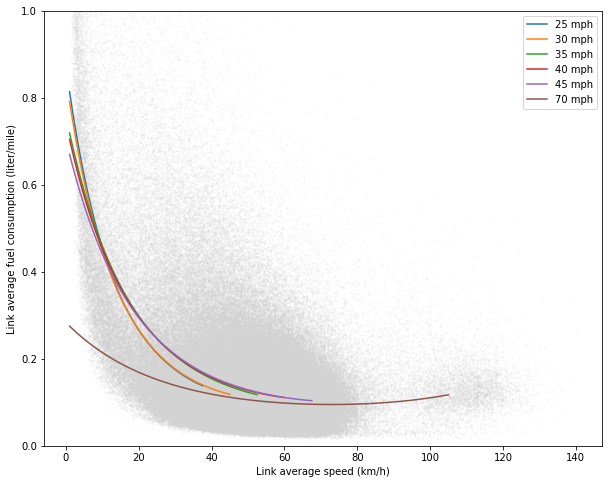

In [6]:
#polynomial fit with degree = 2
emission_data['x'] = emission_data['link_average_speed_kmph']/100
emission_data['y'] = np.log(emission_data['link_average_fuel_lpm'])

#add fitted polynomial line to scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(emission_data['link_average_speed_kmph'], 
           emission_data['link_average_fuel_lpm'], s=1, alpha=0.1, c='lightgray')

for max_speed in [25, 30, 35, 40, 45, 70]:
    subdata = emission_data[emission_data['maxspeed_range']==max_speed]
    coefs = poly.polyfit(subdata['x'], subdata['y'], 2)
    ffit = poly.Polynomial(coefs) 
    print(coefs)
    polyline = np.linspace(1, max_speed*1.5, 50)
    plt.plot(polyline, np.exp(ffit(polyline/100)), label='{} mph'.format(max_speed))

ax.set_xlabel('Link average speed (km/h)')
ax.set_ylabel('Link average fuel consumption (liter/mile)')
ax.set_ylim([0, 1])
ax.legend()

### Data preparation

In [4]:
### modeling data
ice_maf_model =  pd.read_csv('emission_data/ice_maf_macro.csv')
ice_maf_model = ice_maf_model.set_index('edge_id')
### remove small speed
ice_maf_model = ice_maf_model[ice_maf_model['link_average_speed_kmph']>1]
### remove empty emission
ice_maf_model = ice_maf_model[ice_maf_model['link_average_fuel_lpm']>0]

edges_df = pd.read_csv('emission_data/michigan_undirected_edges.csv')
edges_df['edge_id'] = np.arange(edges_df.shape[0])
edges_df['maxspeed'] = edges_df['maxspeed'].astype(str).apply(lambda x: np.mean([int(s) for s in x.split() if s.isdigit()]))
ice_maf_model = ice_maf_model.join(edges_df.set_index('edge_id')[['maxspeed']])
print(ice_maf_model.shape)
ice_maf_model = ice_maf_model.dropna(subset=['maxspeed']).reset_index()
print(ice_maf_model.shape)
ice_maf_model['maxspeed_range'] = ice_maf_model['maxspeed']//5*5

(357970, 8)
(239997, 9)


/Users/bingyu/opt/anaconda3/envs/cities/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [7]:
ice_maf_model[['edge_id', 'VehId', 'Trip', 
               'link_average_speed_kmph', 'link_average_fuel_lpm', 'maxspeed_range']].to_csv('emission_data/regression_data.csv', index=False)